In [1]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector
#     print(features)
#     print(classes)
    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
                pass
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [8]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL,names= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Species'],header= None)
iris = iris.dropna()

## (1) A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

In [9]:
iris.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

In [3]:
iris


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [6]:
iris.data


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

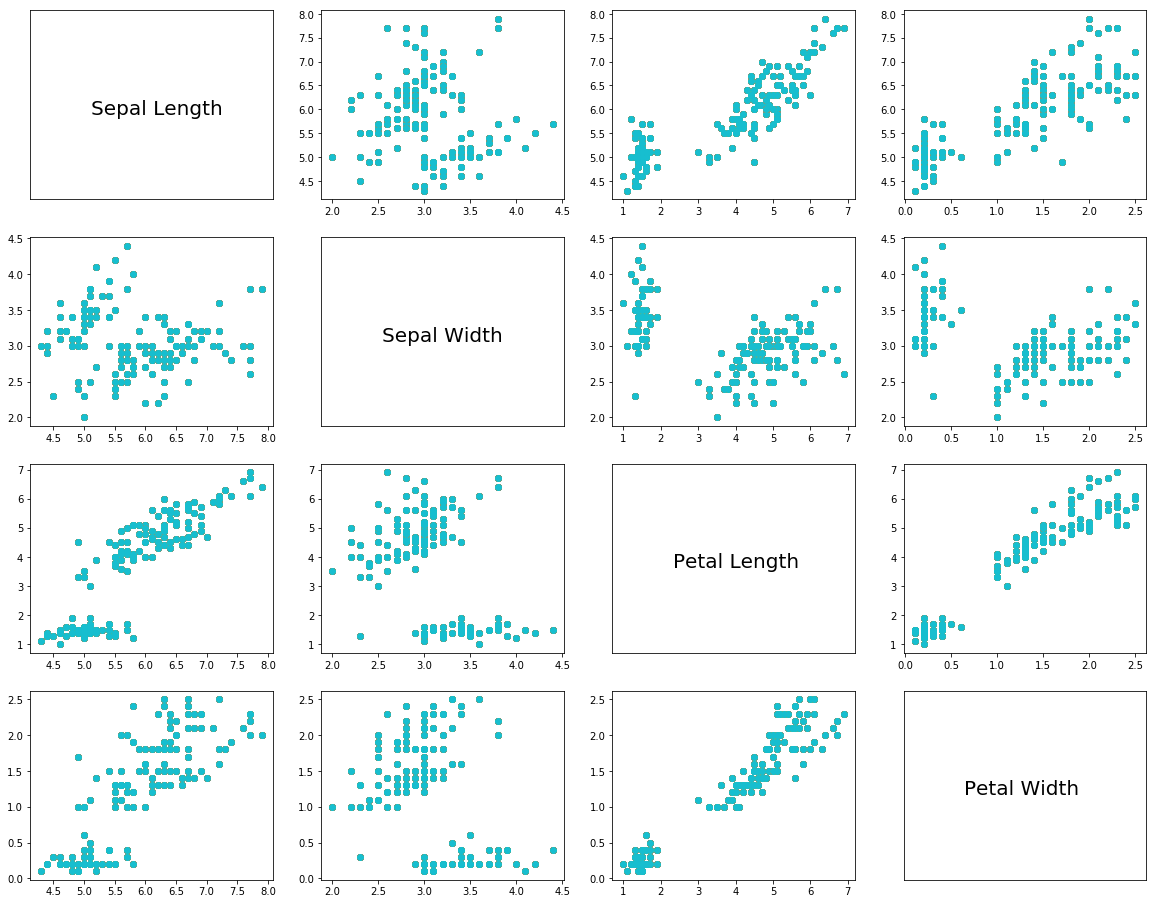

In [3]:
pairs(iris)

## (2) A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [4]:
def getLinearScatterPlot(iris, i, j,plt):
    X = iris[[i]].values
    y = iris[[j]].values
    # Split the targets into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    ax = plt.subplot(len(iris.columns)-1, len(iris.columns)-1, i * 4 + j + 1) 
    ax.set_xlabel(str(iris.columns[i]))
    ax.set_ylabel(str(iris.columns[j]));
    
    ax.scatter(X_test, y_test,  color='black',label = "score: ")
    ax.plot(X_test, regr.predict(X_test), color='blue',label = "score: ",
             linewidth=3)

    ax.set_title("score: " + str(regr.score(X_test, y_test)) )
    return [regr.coef_[0][0], np.mean((regr.predict(X_test) - y_test) ** 2),regr.score(X_test, y_test)]


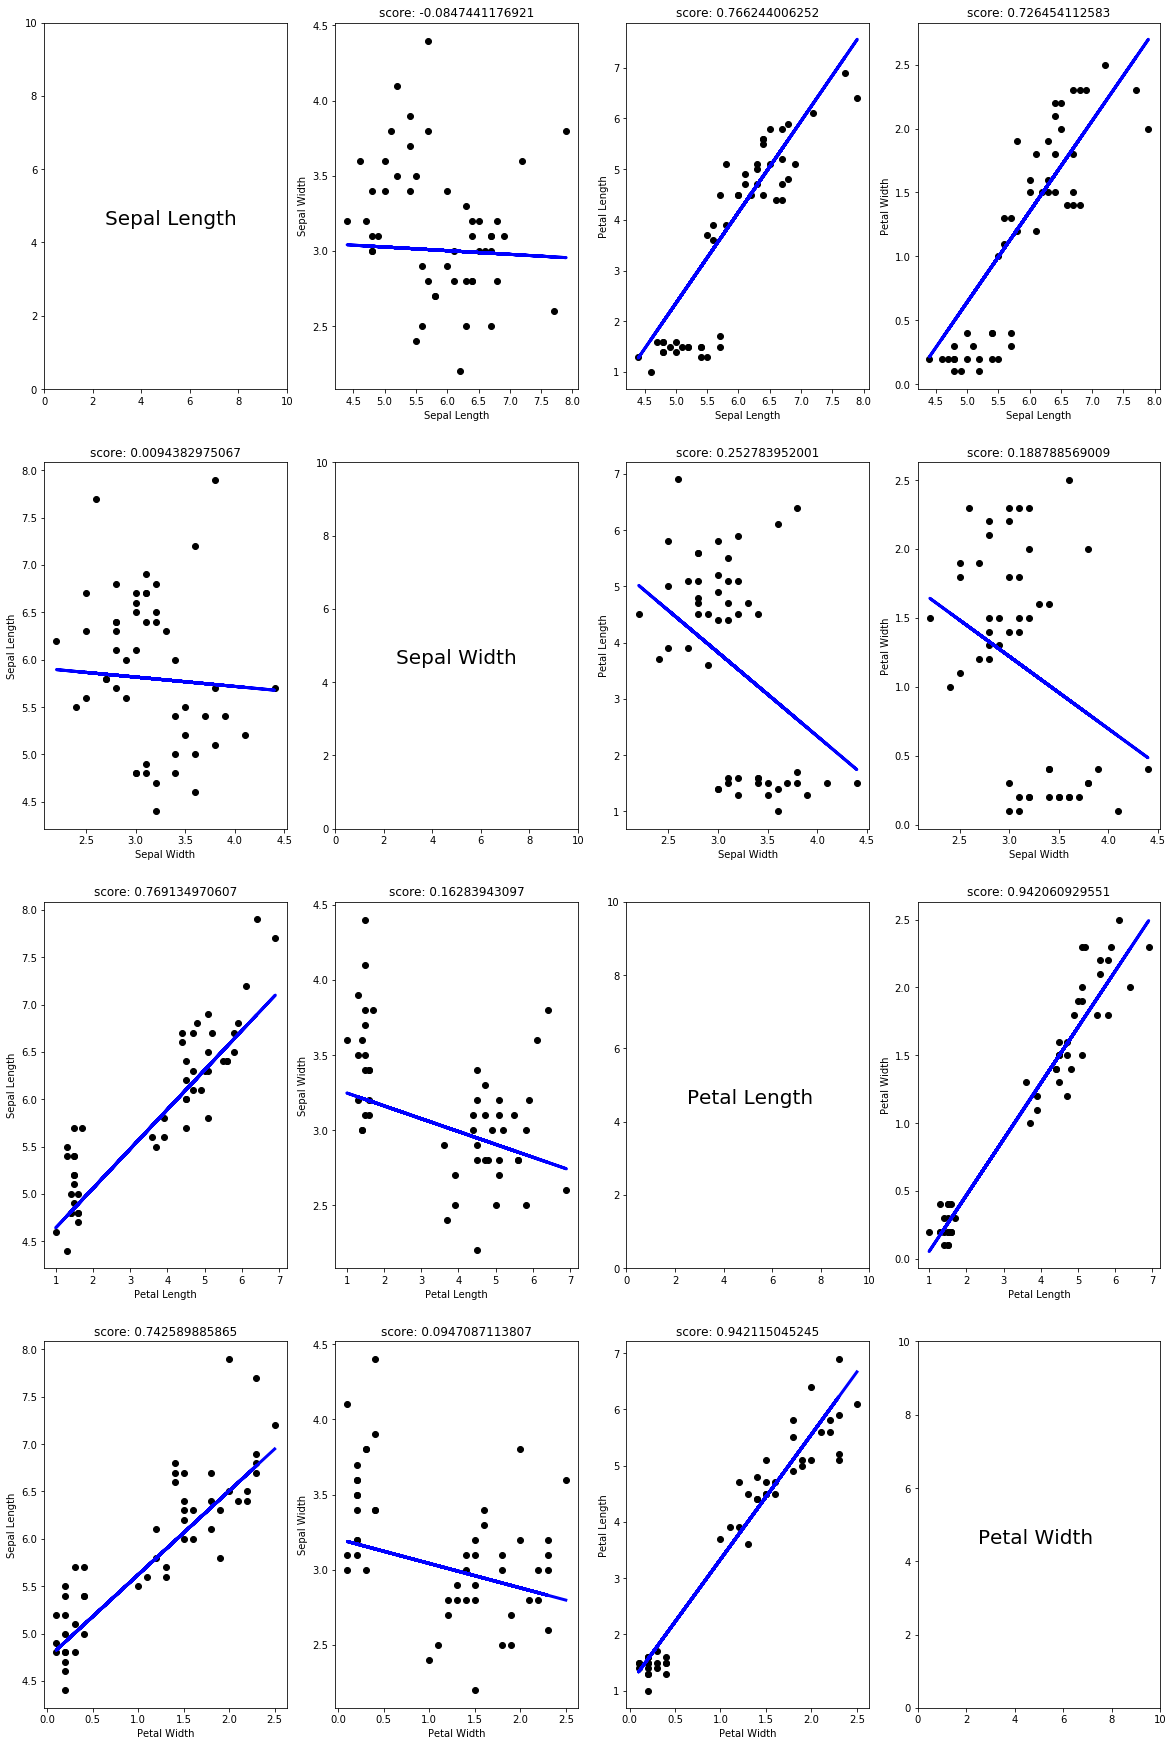

In [5]:
features = []
figure = plt.figure(figsize=(5*(len(iris.columns)-1), 4*(len(iris.columns)-1) + 15))
for i in range(4):
    for j in range(4):
        if(i == j):
            ax = plt.subplot(len(iris.columns)-1, len(iris.columns)-1, i * 4 + j + 1) 
            ax.text(2.5, 4.5, iris.columns.values[i], style='normal', fontsize=20)
            ax.axis([0, 10, 0, 10])
            pass
        else:
            getLinearScatterPlot(iris,i,j,plt)
plt.show()

### （3）A brief visual and/or descriptive highlight of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics. 

In [6]:
def getAllCombination(iris,startIndex,result,tempResult):
    if startIndex >= len(iris.columns) or len(tempResult) >= len(iris.columns) - 1:
        return
    result.append(tempResult.copy())
    for i in range(startIndex,len(iris.columns) - 1):
        tempResult.append(i)
        getAllCombination(iris,i + 1,result,tempResult)
        del tempResult[-1]

In [7]:
def getModelStat(iris,XFeatures,yFeature):
    X = iris[[XFeatures[0]]].values 
    
    for i in range(1,len(XFeatures)):
        X = np.hstack((X,iris[[XFeatures[i]]].values))

    y = iris[[yFeature]].values
    # Split the targets into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    return [regr.coef_[0][0], np.mean((regr.predict(X_test) - y_test) ** 2),regr.score(X_test, y_test)]

In [8]:
def buildTitle(names,XFeatures, y):
    str = "X: "
    for feature in XFeatures:
        str = str + names[feature]
        str = str + ","
    str = str + "Y: "
    str = str + names[y]
    return str

In [9]:
allFComb = []
tempComb = []
getAllCombination(iris,0,allFComb,tempComb)
allFComb.remove([])
resultList = []
features = []
for feature in allFComb:
    for y in range(len(iris.columns) - 1):
        if y not in feature:
            p = getModelStat(iris,feature,y)
            resultList.append(p)
            features.append(buildTitle(iris.columns,feature,y))

In [10]:
df2=DataFrame(resultList,index=features,columns=['Coefficients','Mean squared error','Variance score'])  

In [11]:
df2

,Coefficients,Mean squared error,Variance score
"X: Sepal Length,Y: Sepal Width",-0.024447,0.220962,-0.084744
"X: Sepal Length,Y: Petal Length",1.796483,0.770936,0.766244
"X: Sepal Length,Y: Petal Width",0.710447,0.170583,0.726454
"X: Sepal Length,Sepal Width,Y: Petal Length",1.764383,0.331325,0.899539
"X: Sepal Length,Sepal Width,Y: Petal Width",0.699277,0.110868,0.822214
"X: Sepal Length,Sepal Width,Petal Length,Y: Petal Width",-0.261129,0.037491,0.939880
"X: Sepal Length,Sepal Width,Petal Width,Y: Petal Length",0.748484,0.107473,0.967413
"X: Sepal Length,Petal Length,Y: Sepal Width",0.513407,0.102964,0.494530
"X: Sepal Length,Petal Length,Y: Petal Width",-0.128772,0.039972,0.935901
"X: Sepal Length,Petal Length,Petal Width,Y: Sepal Width",0.594332,0.096021,0.528614


## The best overall linear regression model (according to the variance score):

In [12]:
maxV = max(df2['Variance score'])
df2[df2['Variance score'] == maxV]

,Coefficients,Mean squared error,Variance score
"X: Sepal Length,Sepal Width,Petal Width,Y: Petal Length",0.748484,0.107473,0.967413


#### From the result above we can see that : when we choose the Seqal length, Sepal width and Petal width as our features to predict the petal length of iris flower, we will get the highest variance score

### (4)  Based upon the linear models you generated, which pair of features appear to be the most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

##### answer : the pair of (petal_width,petal_length) appears to be the most predictive for one another because their variance score is 0.94. The highest score of all of the pairs

### (5)  Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?


##### answer : such change will affect very little to the classification performance.  One relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated. As one of feature can be perdicted very well based upon other features, this feature can thus be removed without incurring much loss of information. 